<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/69_Day_Gradient_Boosting_step_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [91]:
np.random.seed(3)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2 + 0.05*np.random.randn(100)

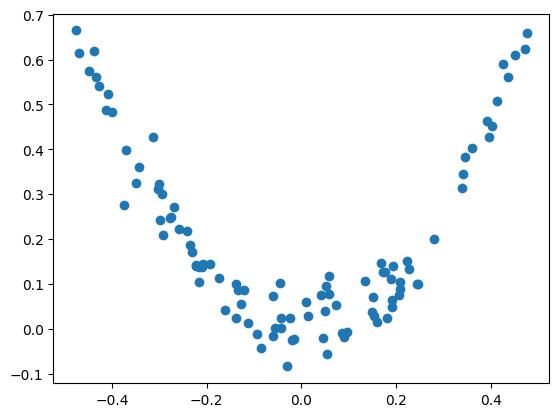

In [92]:
plt.scatter(X,y)

In [93]:
df=pd.DataFrame()
df['X']=X[:,0]
df['y']=y
df.head()

,X,y
0,0.050798,0.038445
1,0.208148,0.088081
2,-0.209095,0.138416
3,0.010828,0.058746
4,0.392947,0.462017


In [94]:
# 1. model - mean

In [95]:
df['y_pred1']=df['y'].mean()
df.head()

,X,y,y_pred1
0,0.050798,0.038445,0.200496
1,0.208148,0.088081,0.200496
2,-0.209095,0.138416,0.200496
3,0.010828,0.058746,0.200496
4,0.392947,0.462017,0.200496


In [96]:
# calculate loss function = actual - pred
df['res1']=df['y']-df['y_pred1']
df.head()

,X,y,y_pred1,res1
0,0.050798,0.038445,0.200496,-0.162051
1,0.208148,0.088081,0.200496,-0.112415
2,-0.209095,0.138416,0.200496,-0.062080
3,0.010828,0.058746,0.200496,-0.141750
4,0.392947,0.462017,0.200496,0.261521


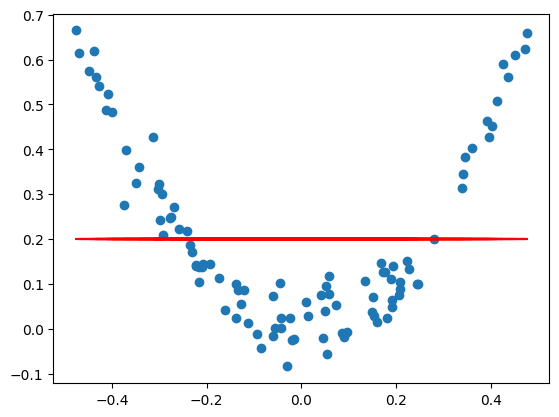

In [97]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['y_pred1'],c='red')

In [98]:
# 2. model 2 train Decision tree
# i/p->  X
# o/p -> res1
lr=0.7
from sklearn.tree import DecisionTreeRegressor
m2=DecisionTreeRegressor(max_depth=8)
m2.fit(df[['X']],df['res1'])
# y_pred = m1+m2
df['y_pred2']=lr*m2.predict(df[['X']]) + df['y'].mean()
df.head()

,X,y,y_pred1,res1,y_pred2
0,0.050798,0.038445,0.200496,-0.162051,0.082060
1,0.208148,0.088081,0.200496,-0.112415,0.134809
2,-0.209095,0.138416,0.200496,-0.062080,0.157040
3,0.010828,0.058746,0.200496,-0.141750,0.082060
4,0.392947,0.462017,0.200496,0.261521,0.383560


In [99]:
X_test = np.linspace(-0.5,0.5,100)
y_pred=lr*m2.predict(X_test.reshape(-1,1)) + df['y'].mean()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


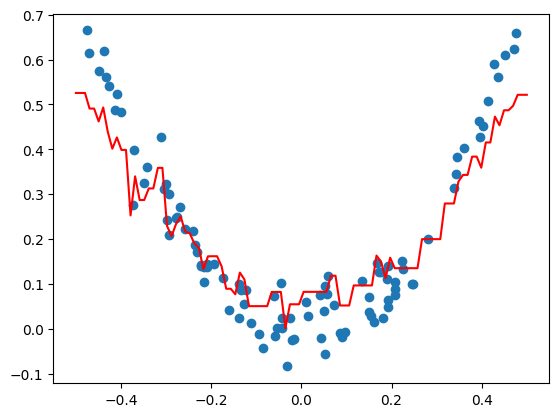

In [100]:
plt.scatter(df['X'],df['y'])
plt.plot(X_test,y_pred,c='red')

In [101]:
# res 2 calculate
df['res2']=df['y']-df['y_pred2']
df.head()

,X,y,y_pred1,res1,y_pred2,res2
0,0.050798,0.038445,0.200496,-0.162051,0.082060,-0.043615
1,0.208148,0.088081,0.200496,-0.112415,0.134809,-0.046728
2,-0.209095,0.138416,0.200496,-0.062080,0.157040,-0.018624
3,0.010828,0.058746,0.200496,-0.141750,0.082060,-0.023314
4,0.392947,0.462017,0.200496,0.261521,0.383560,0.078456


In [102]:
# 3. model 3 decision tree
m3=DecisionTreeRegressor(max_depth=8)
m3.fit(df[['X']],df['res2'])
df['y_pred3']=lr*m3.predict(df[['X']]) + df['y_pred2']
df.head()

,X,y,y_pred1,res1,y_pred2,res2,y_pred3
0,0.050798,0.038445,0.200496,-0.162051,0.082060,-0.043615,0.048000
1,0.208148,0.088081,0.200496,-0.112415,0.134809,-0.046728,0.102617
2,-0.209095,0.138416,0.200496,-0.062080,0.157040,-0.018624,0.144003
3,0.010828,0.058746,0.200496,-0.141750,0.082060,-0.023314,0.048000
4,0.392947,0.462017,0.200496,0.261521,0.383560,0.078456,0.438480


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


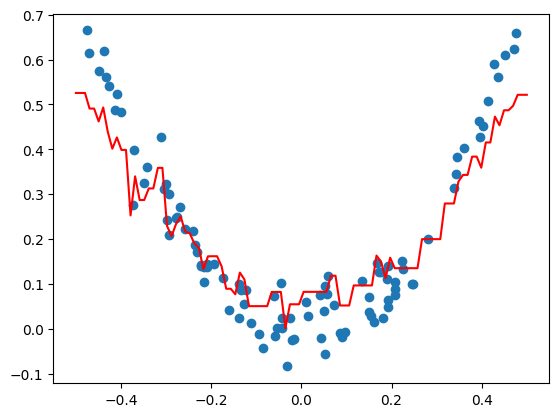

In [103]:
X_test = np.linspace(-0.5,0.5,100)
y_pred=lr*m2.predict(X_test.reshape(-1,1)) + df['y'].mean()
plt.scatter(df['X'],df['y'])
plt.plot(X_test,y_pred,c='red')

# class

In [104]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

    if number ==0:
      return
    else :

      # do gradient boosting

      if count>1:
        y=y-regs[-1].predict(X)
      else :
        foo=y

      dt=DecisionTreeRegressor(max_depth=8)
      dt.fit(X,y)
      regs.append(dt)

      x1=np.linspace(-0.5,0.5,100)
      y_pred=sum(lr*regressors.predict(x1.reshape(-1,1)) for regressors in regs)
      plt.scatter(df['X'],df['y'])
      plt.plot(x1,y_pred,c='red')
      plt.show()

      gradient_boost(X,y,number-1,lr,count+1,regs,foo)


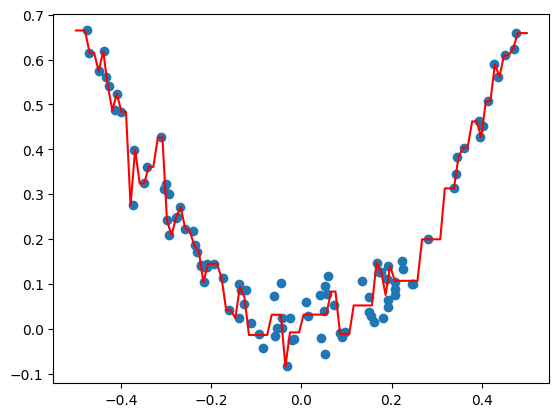

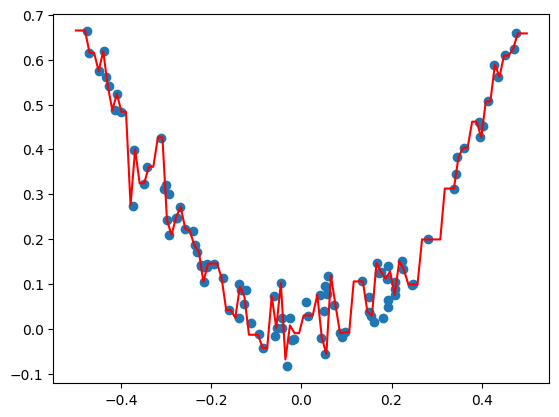

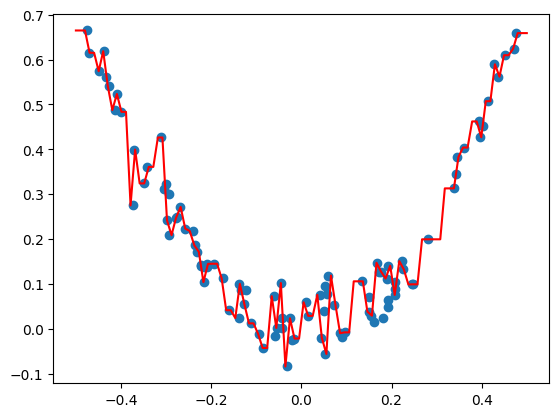

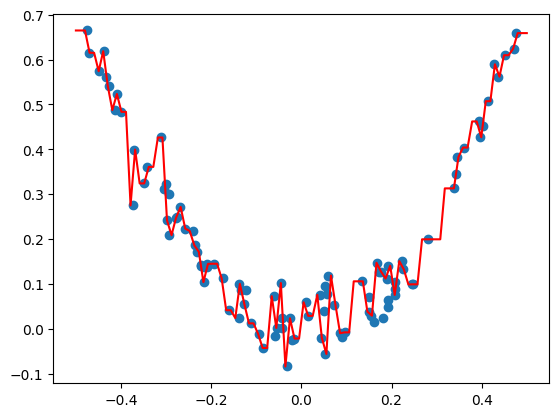

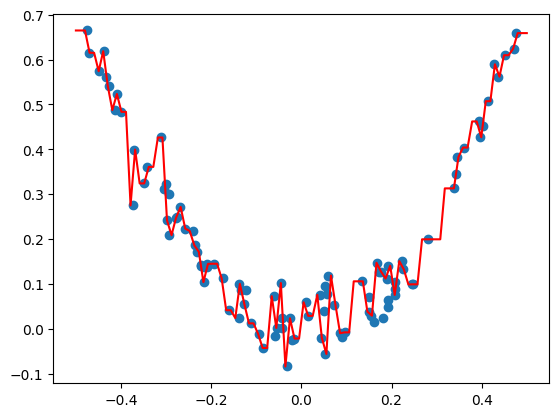

In [105]:
np.random.seed(3)
X=np.random.rand(100,1)-0.5
y=3*X[:,0]**2 + 0.05*np.random.randn(100)

gradient_boost(X,y,5,lr=1)